In [1]:
%matplotlib inline

In [2]:
import os
import random
import utils
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from osgeo import gdal
from IPython.display import clear_output
from matplotlib.patches import Rectangle
from skimage import measure, morphology

np.set_printoptions(precision = 2)
np.set_printoptions(suppress  = True)

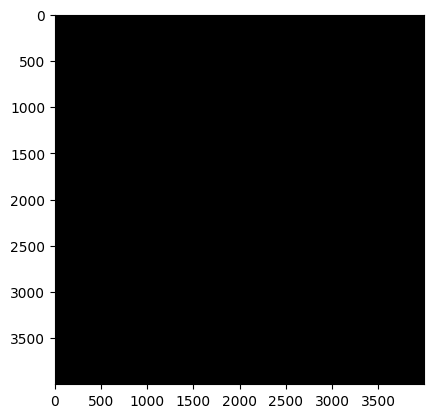

In [3]:
# Abrir el archivo TIFF
ruta_tiff = "D:/Datos Hector Junior/Databases/rgb_palmas.tif"
dataset   = gdal.Open(ruta_tiff, gdal.GA_ReadOnly)

if dataset is None:
    raise RuntimeError("No se pudo abrir el archivo TIFF.")

# Parameters
Nx   =  dataset.RasterXSize
Ny   =  dataset.RasterYSize
Nz   =  dataset.RasterCount
Nw   = 4000
step = 3900

    
# Index images
indx_x = np.unique(np.concatenate(([np.arange(0, Nx-Nw, step)], [np.array([Nx-Nw])]), axis = 1))
indx_y = np.unique(np.concatenate(([np.arange(0, Ny-Nw, step)], [np.array([Ny-Nw])]), axis = 1))
    
 # Cut images
for i in indx_x:
    for j in indx_y:
        #i_idx = np.arange(i, i+Nw)
        #j_idx = np.arange(j, j+Nw)

        block = np.zeros((Nw, Nw, Nz), dtype=np.uint8)
        
        for k in range(Nz):
            band = dataset.GetRasterBand(k + 1)
            block[:,:,k] = band.ReadAsArray(i, j, Nw, Nw)

        
        # block = img[i_idx[:, None], j_idx[None, :], :]
        # block = utils.convert_8bits(block)
        
        clear_output(wait=True)
        plt.figure()
        plt.imshow(block)
        plt.show()

